# Projeto Capstone
## Visão geral

Quando queremos ir ao cinema, o quanto podemos confiar nos reviews e avaliações de sites? Especialmente se a companhia que mostra a avaliação é a mesma que faz dinheiro vendendo ingressos do filme. Teriam eles algum viés para classificar um filme com nota maior do que deveria?

### Objetivo:
Queremos determinar, com base no artigo disponibilizado pelo 538 (FiveThirtyEight), se o site Fandango avaliou de forma diferente os filmes para vender mais ingressos.

**Artigo: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----
### Dados

Existem dois arquivos disponíveis: um com as avaliações do Fandango e outro com avaliações de outros sites, como Metacritic, IMDB e Rotten Tomatoes. Os dados estão disponíveis no github do 538: https://github.com/fivethirtyeight/data.

-----
#### all_sites_scores.csv
`all_sites_scores.csv` contém todos os filmes que foram avaliados pelo Rotten Tomatoes, um RT User rating, um Metacritic score, um Metacritic User score, e um IMDb score, e ao menos 30 reviews de fãs no Fandango.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDB user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDB

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contém todos os filmes que o 538 tirou do Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Explorando avaliações do Fandango vs avaliações de usuários

Vamos explorar as avaliações do Fandango para ver se nossa análise está de acordo com a conclusão do artigo.

In [2]:
fandango = pd.read_csv("C:\\Users\\henri/pythonNotebooks/06-Capstone-Project/fandango_scrape.csv")

Explorar as informações dos dados

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Relação entre a popularidade de um filme e sua avaliação

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

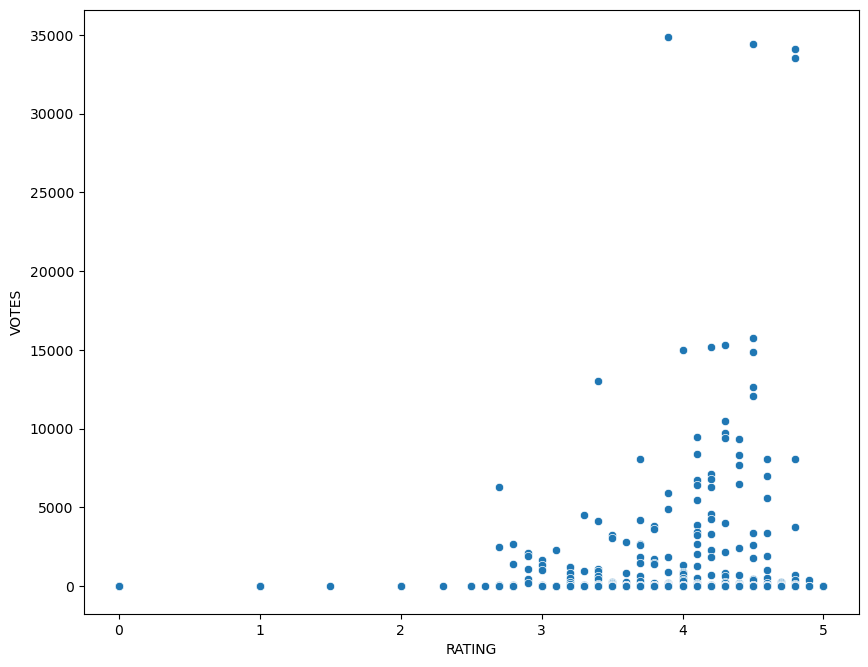

In [6]:
plt.figure(figsize=(10,8), dpi=100)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

Correlação entre as colunas

In [7]:
fandango.set_index('FILM').corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Separar os títulos dos filmes do ano em que foram lançados e criar uma nova coluna como 'Year'

In [8]:
title = 'Film Title Name (Year)'
title.split('(')

['Film Title Name ', 'Year)']

In [9]:
title.split('(')[-1].replace(')','')

'Year'

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [11]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


Quantidade de filmes no Fandango por ano

In [12]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2012      1
1964      1
2016      1
Name: YEAR, dtype: int64

Vamos ver a quantidade de filmes por ano com um countplot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

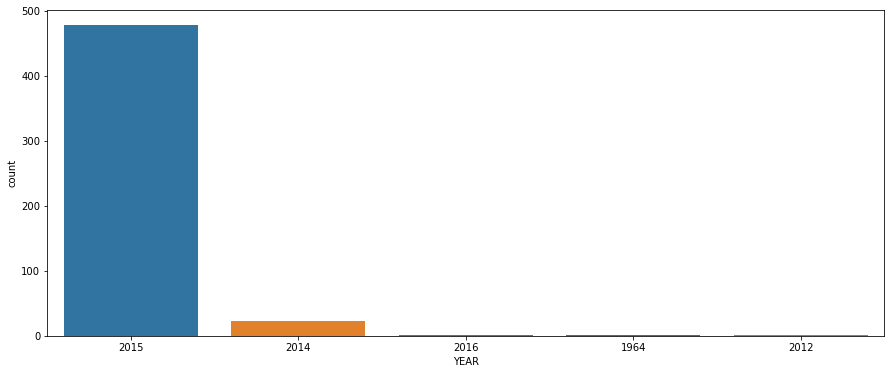

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data=fandango,x='YEAR')

Os 10 filmes com o maior número de votos

In [15]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Filmes com zero votos

In [16]:
(fandango['VOTES']==0).value_counts()

False    435
True      69
Name: VOTES, dtype: int64

Criar dataframe com apenas os filmes que tiveram review

In [17]:
new_fandango = fandango[fandango['VOTES']!=0]
new_fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----
Como visto no artigo, a avaliação real do usuário pode ser um pouco diferente da avaliação mostrada a um usuário.

Vamos criar um KDE plot que mostra a distribuição de avaliações exibidas vs a real avaliação dada pelos votos.

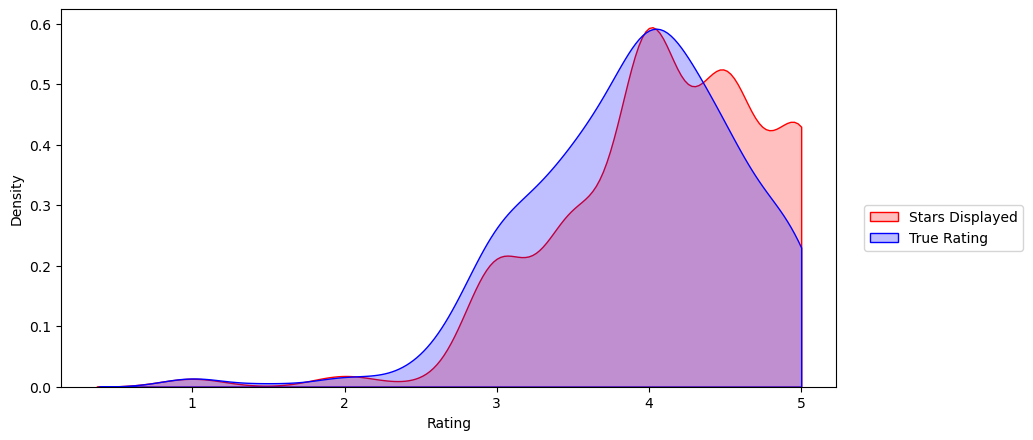

In [18]:
plt.figure(figsize=(10,5),dpi=100)
plt.xlabel('Rating')
sns.kdeplot(new_fandango['STARS'], color='red', shade=True, label='Stars Displayed', clip=[0,5])
sns.kdeplot(new_fandango['RATING'], color='blue', shade=True, label='True Rating', clip=[0,5])
plt.legend(bbox_to_anchor=(1.25, 0.5))

Criar uma nova coluna mostrando a discrepância entre as estrelas mostradas e a real avaliação

In [21]:
new_fandango['STARS_DIFF'] = (new_fandango['STARS']-new_fandango['RATING']).round(2)

C:\Users\henri\anaconda3\envs\new_requirements1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
new_fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Criar um countplot para ver a quantidade de vezes que uma certa discrepância aparece

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

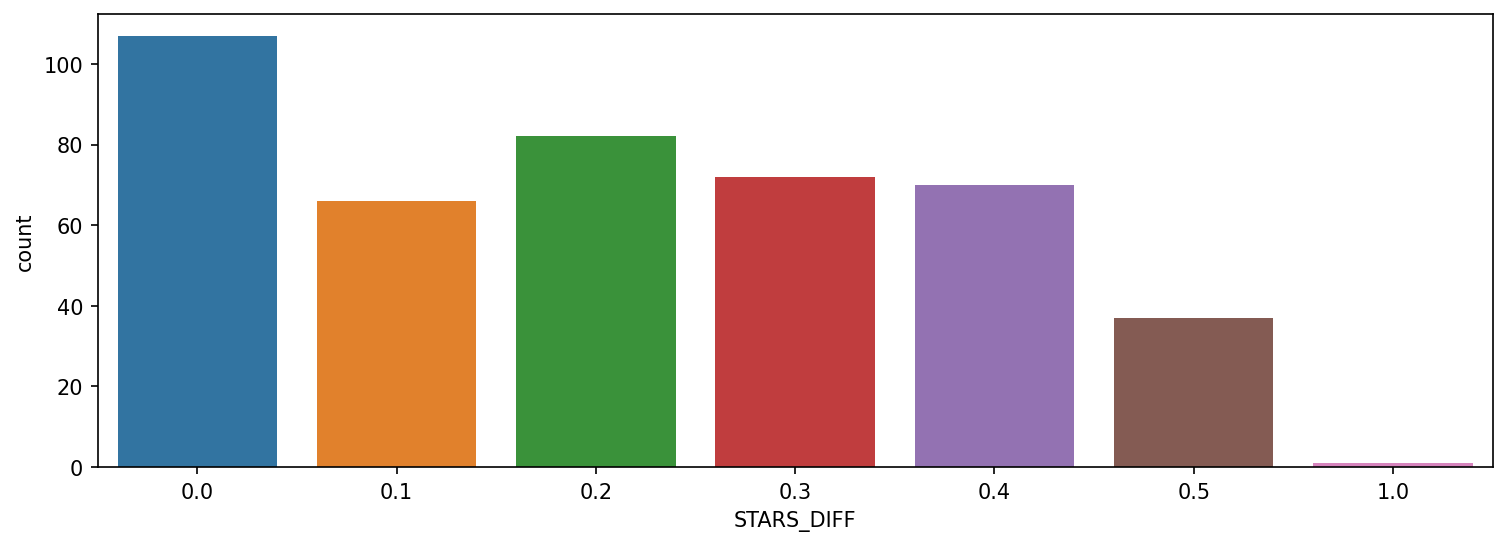

In [24]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=new_fandango, x='STARS_DIFF')

Podemos ver pelo gráfico que um filme teve uma diferença de 1 estrela em relação à sua verdadeira classificação. Vamos ver que filme é esse

In [25]:
new_fandango[new_fandango['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparação da avaliação do Fandango em relação aos outros sites

In [26]:
all_sites = pd.read_csv("C:\\Users\\henri/pythonNotebooks/06-Capstone-Project/all_sites_scores.csv")

---
Explorar as informações do dataframe

In [27]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [28]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Vamos ver primeiro o Rotten Tomatoes. Há dois tipos de reviews: avaliações de críticos e avaliações dos usuários

Criar um scatterplot para explorar a relação entre a avaliação dos críticos e avaliação dos usuários.

(0.0, 100.0)

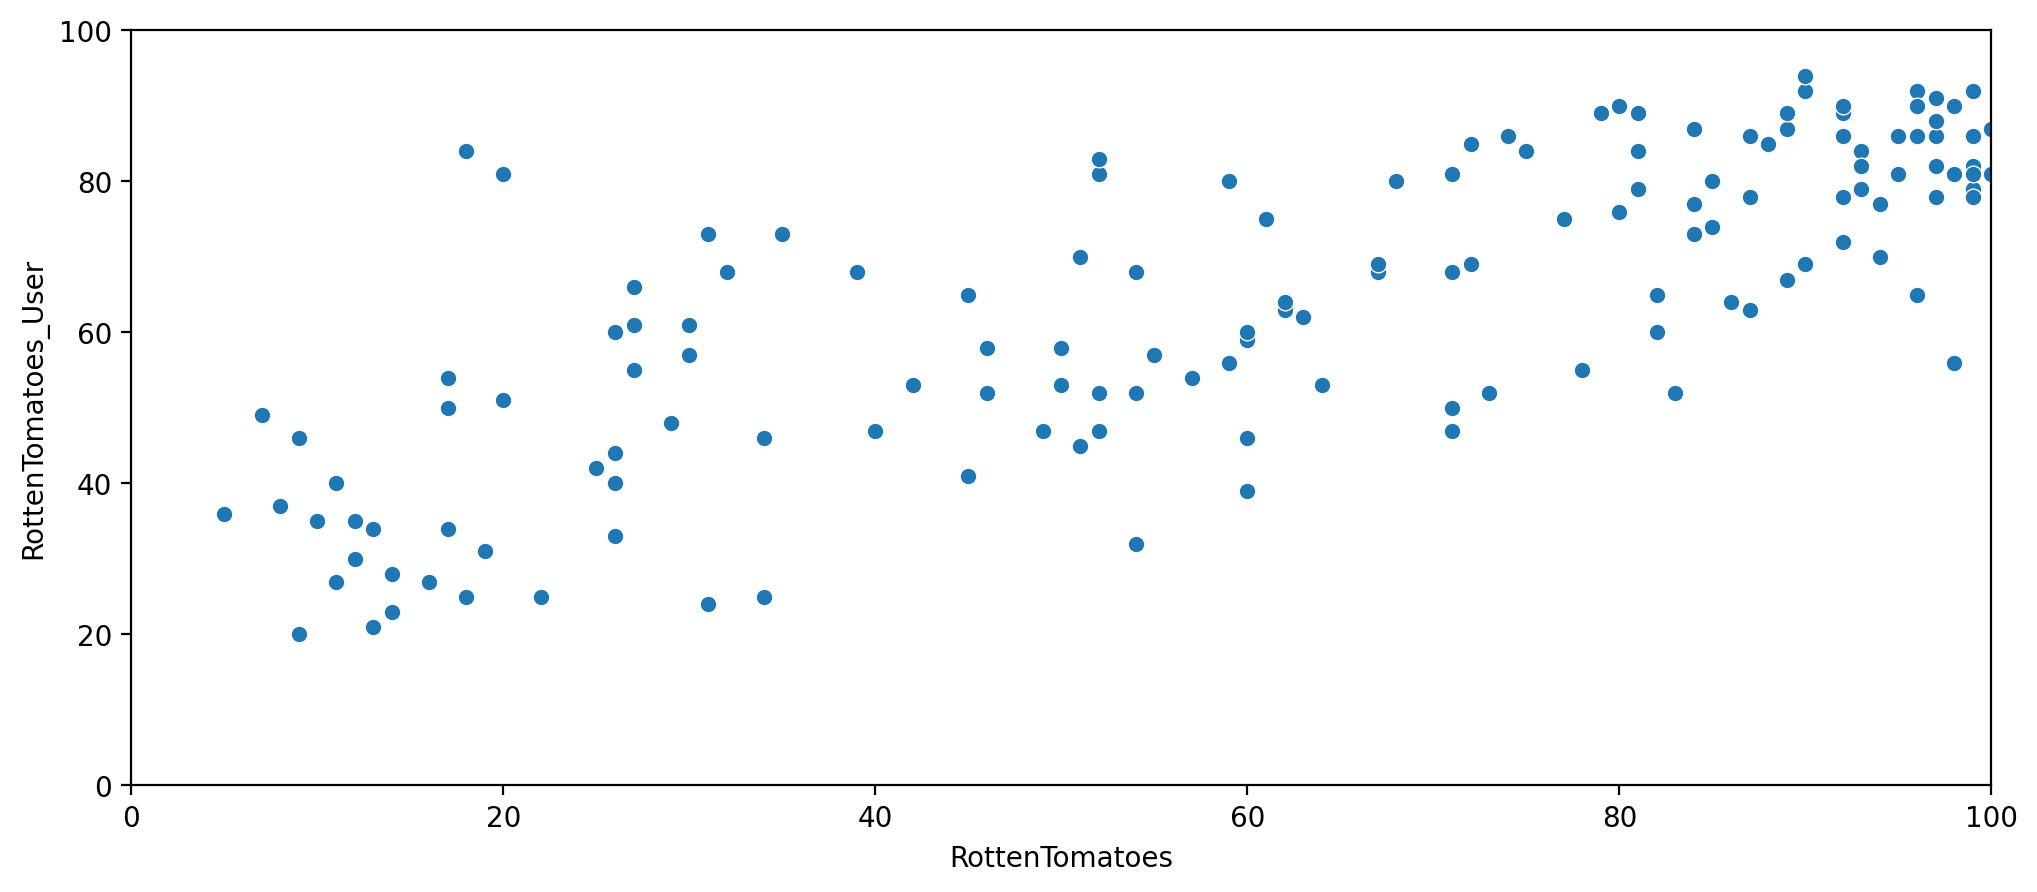

In [30]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

Vamos ver a diferença entre a avaliação da crítica e dos usuários. Note que para uma diferença perto de zero, isso significa que a crítica e os usuários tiveram opiniões parecidas para o filme em questão. Diferenças positivias grandes significam que a crítica avaliou de forma mais alta o filme do que os usuários. Diferenças negativas grandes siginificam que os usuários avaliaram de forma mais alta do que a crítica.

Para explorar essa diferença, criamos uma nova coluna de nome 'RT_DIFF'.

In [31]:
all_sites['RT_DIFF'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Agora, vamos analisar a diferença média geral. Para isso, primeiro temos que pegar o valor absoluto das diferenças (para não lidarmos com valores negativos), e então calcular a média.

In [32]:
abs(all_sites['RT_DIFF']).mean()

15.095890410958905

---
Em seguida, vamos plotar a distribuição das diferenças entre a avaliação da crítica e dos usuários.

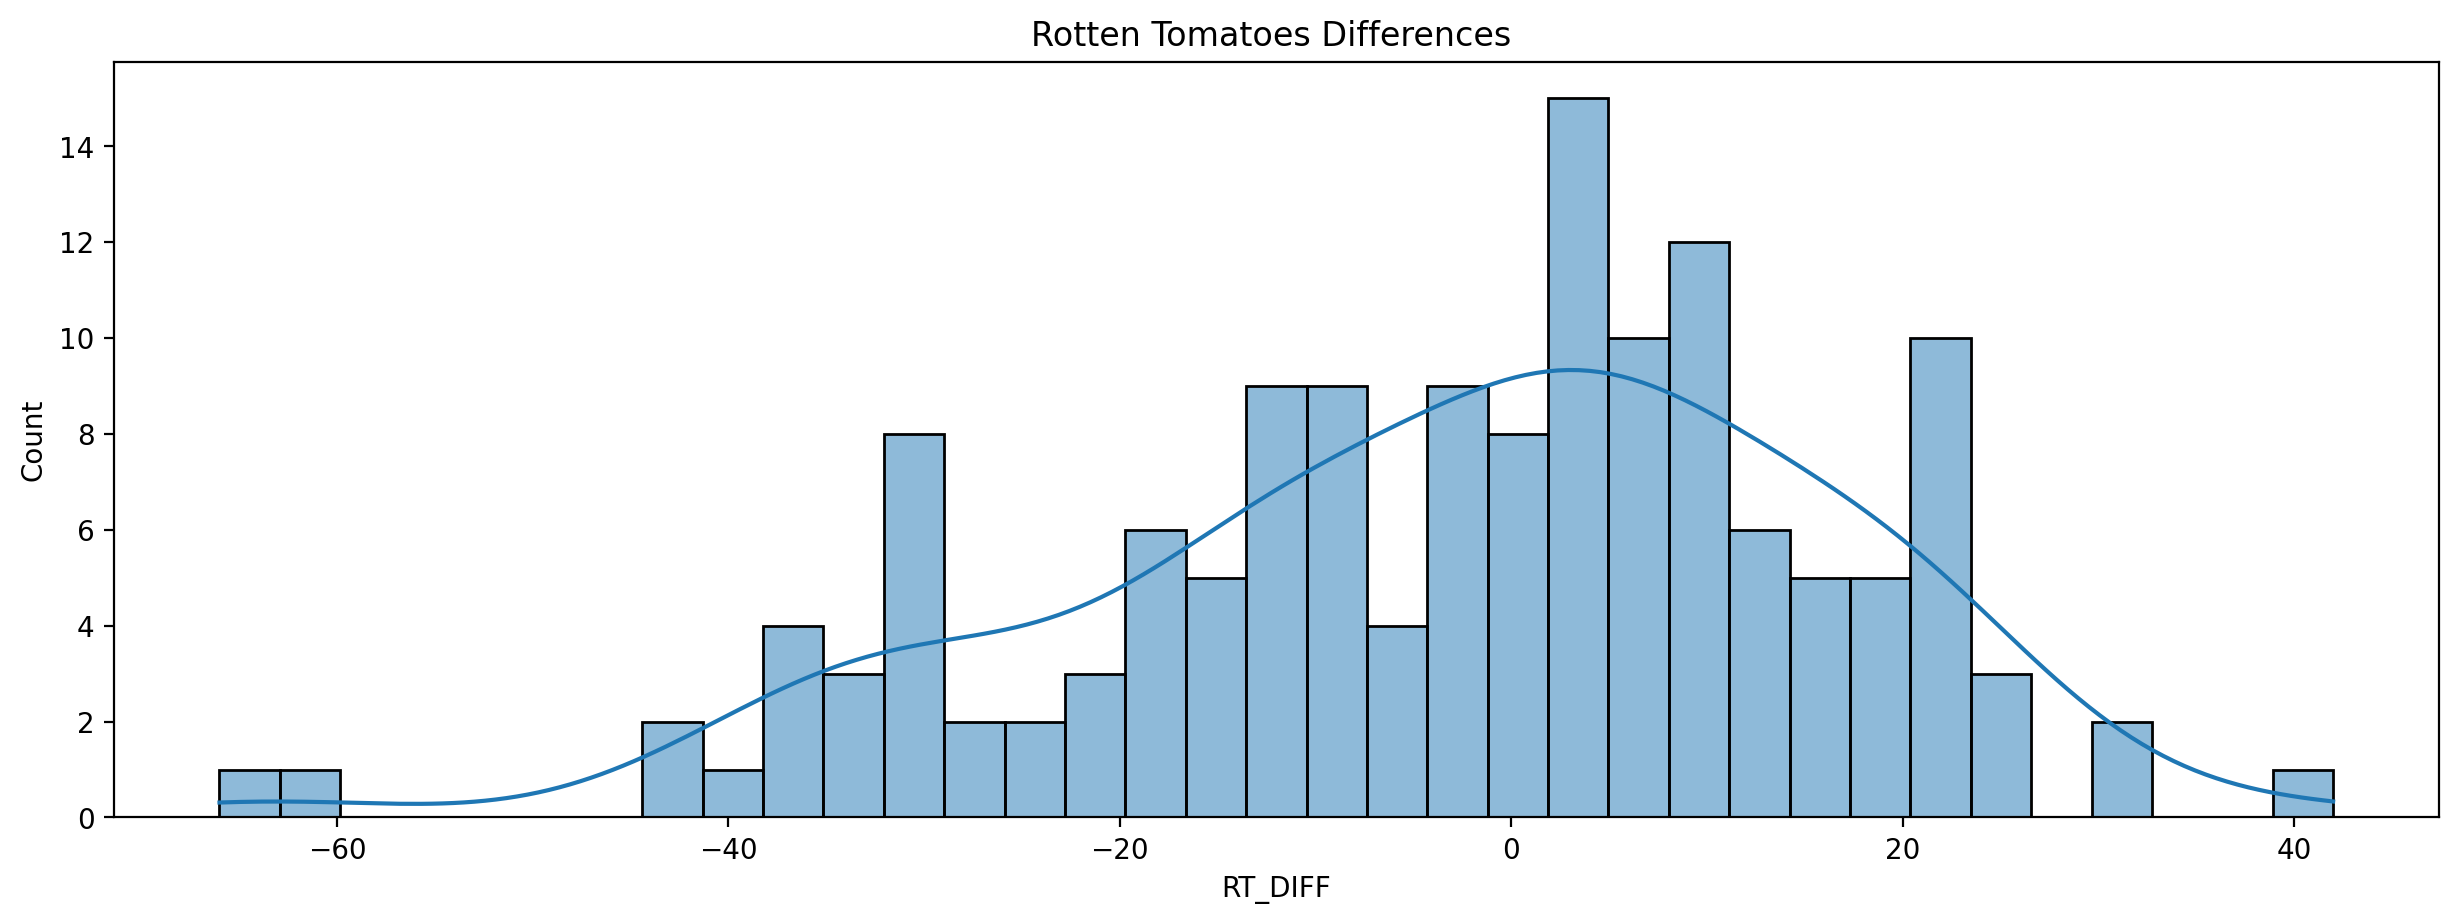

In [35]:
plt.figure(figsize=(15,5), dpi=200)
sns.histplot(data=all_sites,x='RT_DIFF', kde=True, bins=35)
plt.title('Rotten Tomatoes Differences ');

Agora, ao invés de vermos a distribuição das diferenças, vamos explorar a distribuição do valor absoluto das diferenças.

<Figure size 2000x1200 with 0 Axes>

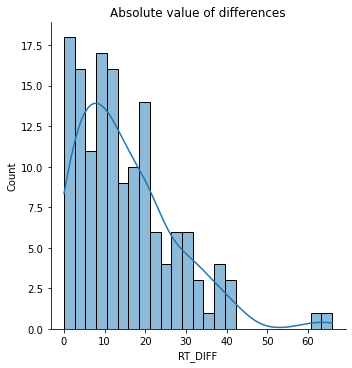

In [41]:
plt.figure(figsize=(10,6),dpi=200);
sns.displot(abs(all_sites['RT_DIFF']), kde=True, bins=25);
plt.title('Absolute value of differences');

Vamos descobrir quais filmes estão causando as maiores diferenças. Primeiro, devemos procurar o 5 filmes com a maior diferença negativa

In [42]:
print('Filmes que os usários amam, mas a crítica odeia')
all_sites.nsmallest(5, 'RT_DIFF')

Filmes que os usários amam, mas a crítica odeia


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


Agora, os 5 filmes com a maior diferença positiva

In [43]:
print('Filmes que a crítica ama, mas os usuários odeiam')
all_sites.nlargest(5, 'RT_DIFF')

Filmes que a crítica ama, mas os usuários odeiam


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


## MetaCritic

Agora vamos ver os dados do Metacritic.

Criar um scatterplot entre as avalições da crítica para o Metacritic vs a avaliação dos usuários.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

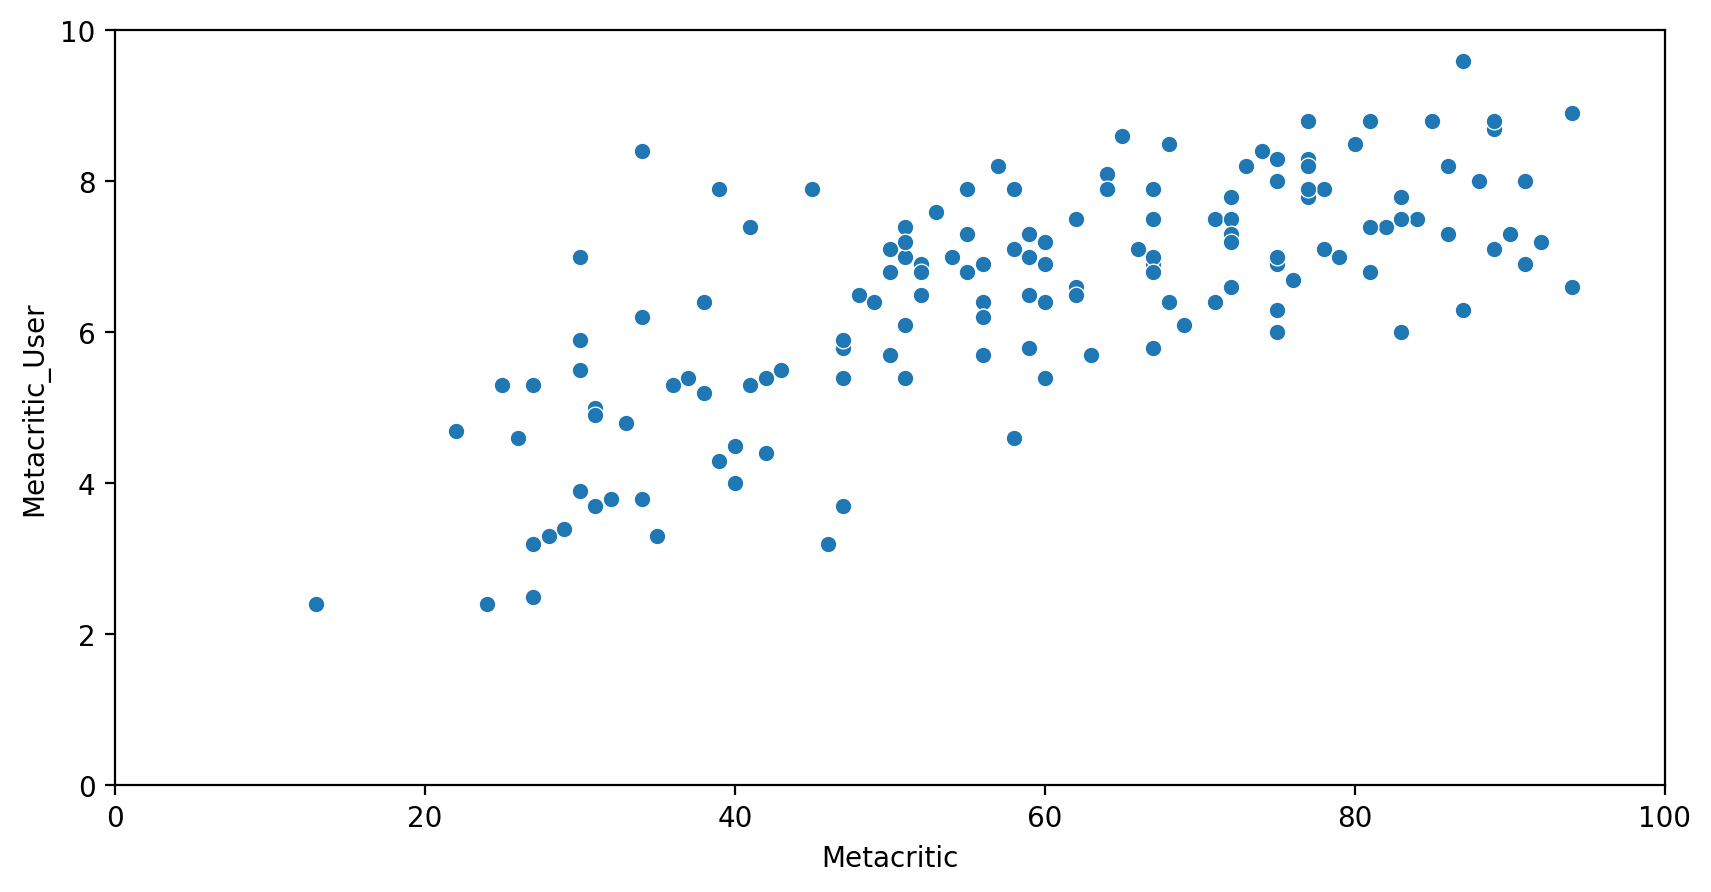

In [146]:
plt.figure(figsize=(10,5),dpi=200)
plt.xlim(0,100)
plt.ylim(0,10)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

## IMDB

Finalmente, vamos explorar os dados do IMDB. Crie um scatterplot entre as features 'Metacritic_user_vote_count' e 'IMDB_user_vote_count', já que os dois reportam a contagem de votos dos filmes. Queremos ver quais os filmes mais populares.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

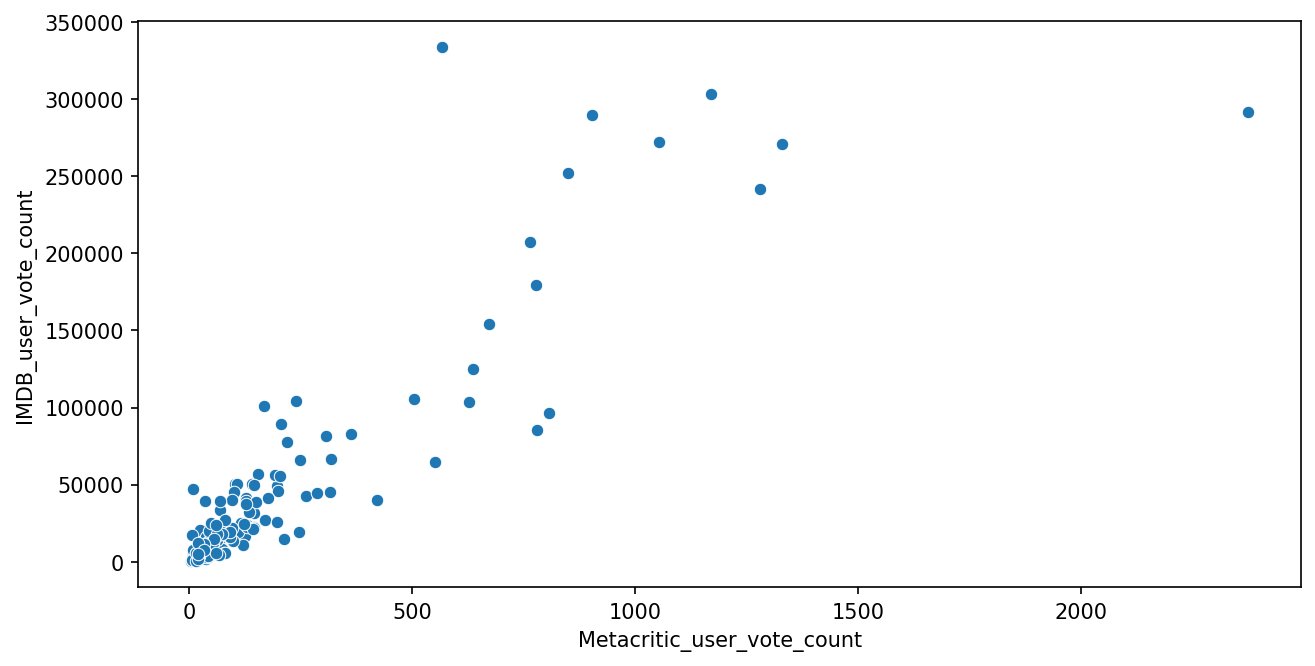

In [44]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

Note que há dois valores atípicos. O filme com a maior quantidade de votos no IMDB tem apenas 500 votos no Metacritic. Vamos ver que filme é esse.

In [126]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


Agora o filme com mais votos pelo Metacritic.

In [125]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango vs. Todos os sites

Para finalizar, vamos ver se o Fandango deu mais votos artificialmente para os filmes para que a venda de ingressos fosse maior.

Combinamos a tabela do Fandango com a tabela de todos os sites. Como nem todos os filmes que estão na tabela do Fandango estão na outra tabela, faremos um *inner* merge para juntar apenas os filmes que estão presentes nas duas tabelas.

In [45]:
combination = pd.merge(fandango, all_sites, how='inner', on='FILM')

In [47]:
combination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_DIFF                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [48]:
combination.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalizando as colunas do Fandango

Note que o RT, Metacritic e IMDB não usam o sistema de avaliação de 0-5 estrelas que nem o Fandango usa. Para compararmos de forma justa todos os dados, precisamos normalizar esses valores para que fiquem todos entre 0-5.

In [49]:
combination['RT_Norm'] = np.round(combination['RottenTomatoes']/20,1)
combination['RTU_Norm'] = np.round(combination['RottenTomatoes_User']/20,1)

In [50]:
combination['Meta_Norm'] = np.round(combination['Metacritic']/20,1)
combination['MetaU_Norm'] = np.round(combination['Metacritic_User']/2,1)

In [51]:
combination['IMDB_Norm'] = np.round(combination['IMDB']/2,1)

In [52]:
combination.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Agora, criamos um novo dataframe que contém apenas as avaliações normalizadas.

In [53]:
norm_scores = combination[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm']]

In [54]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparando as distribuições das avaliações por todos os sites

O momento da verdade! Será que o Fandango avalia de forma anormal os filmes?

Criaremos um plot comparando as distribuições das avaliações normalizadas por todos os sites.

In [55]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

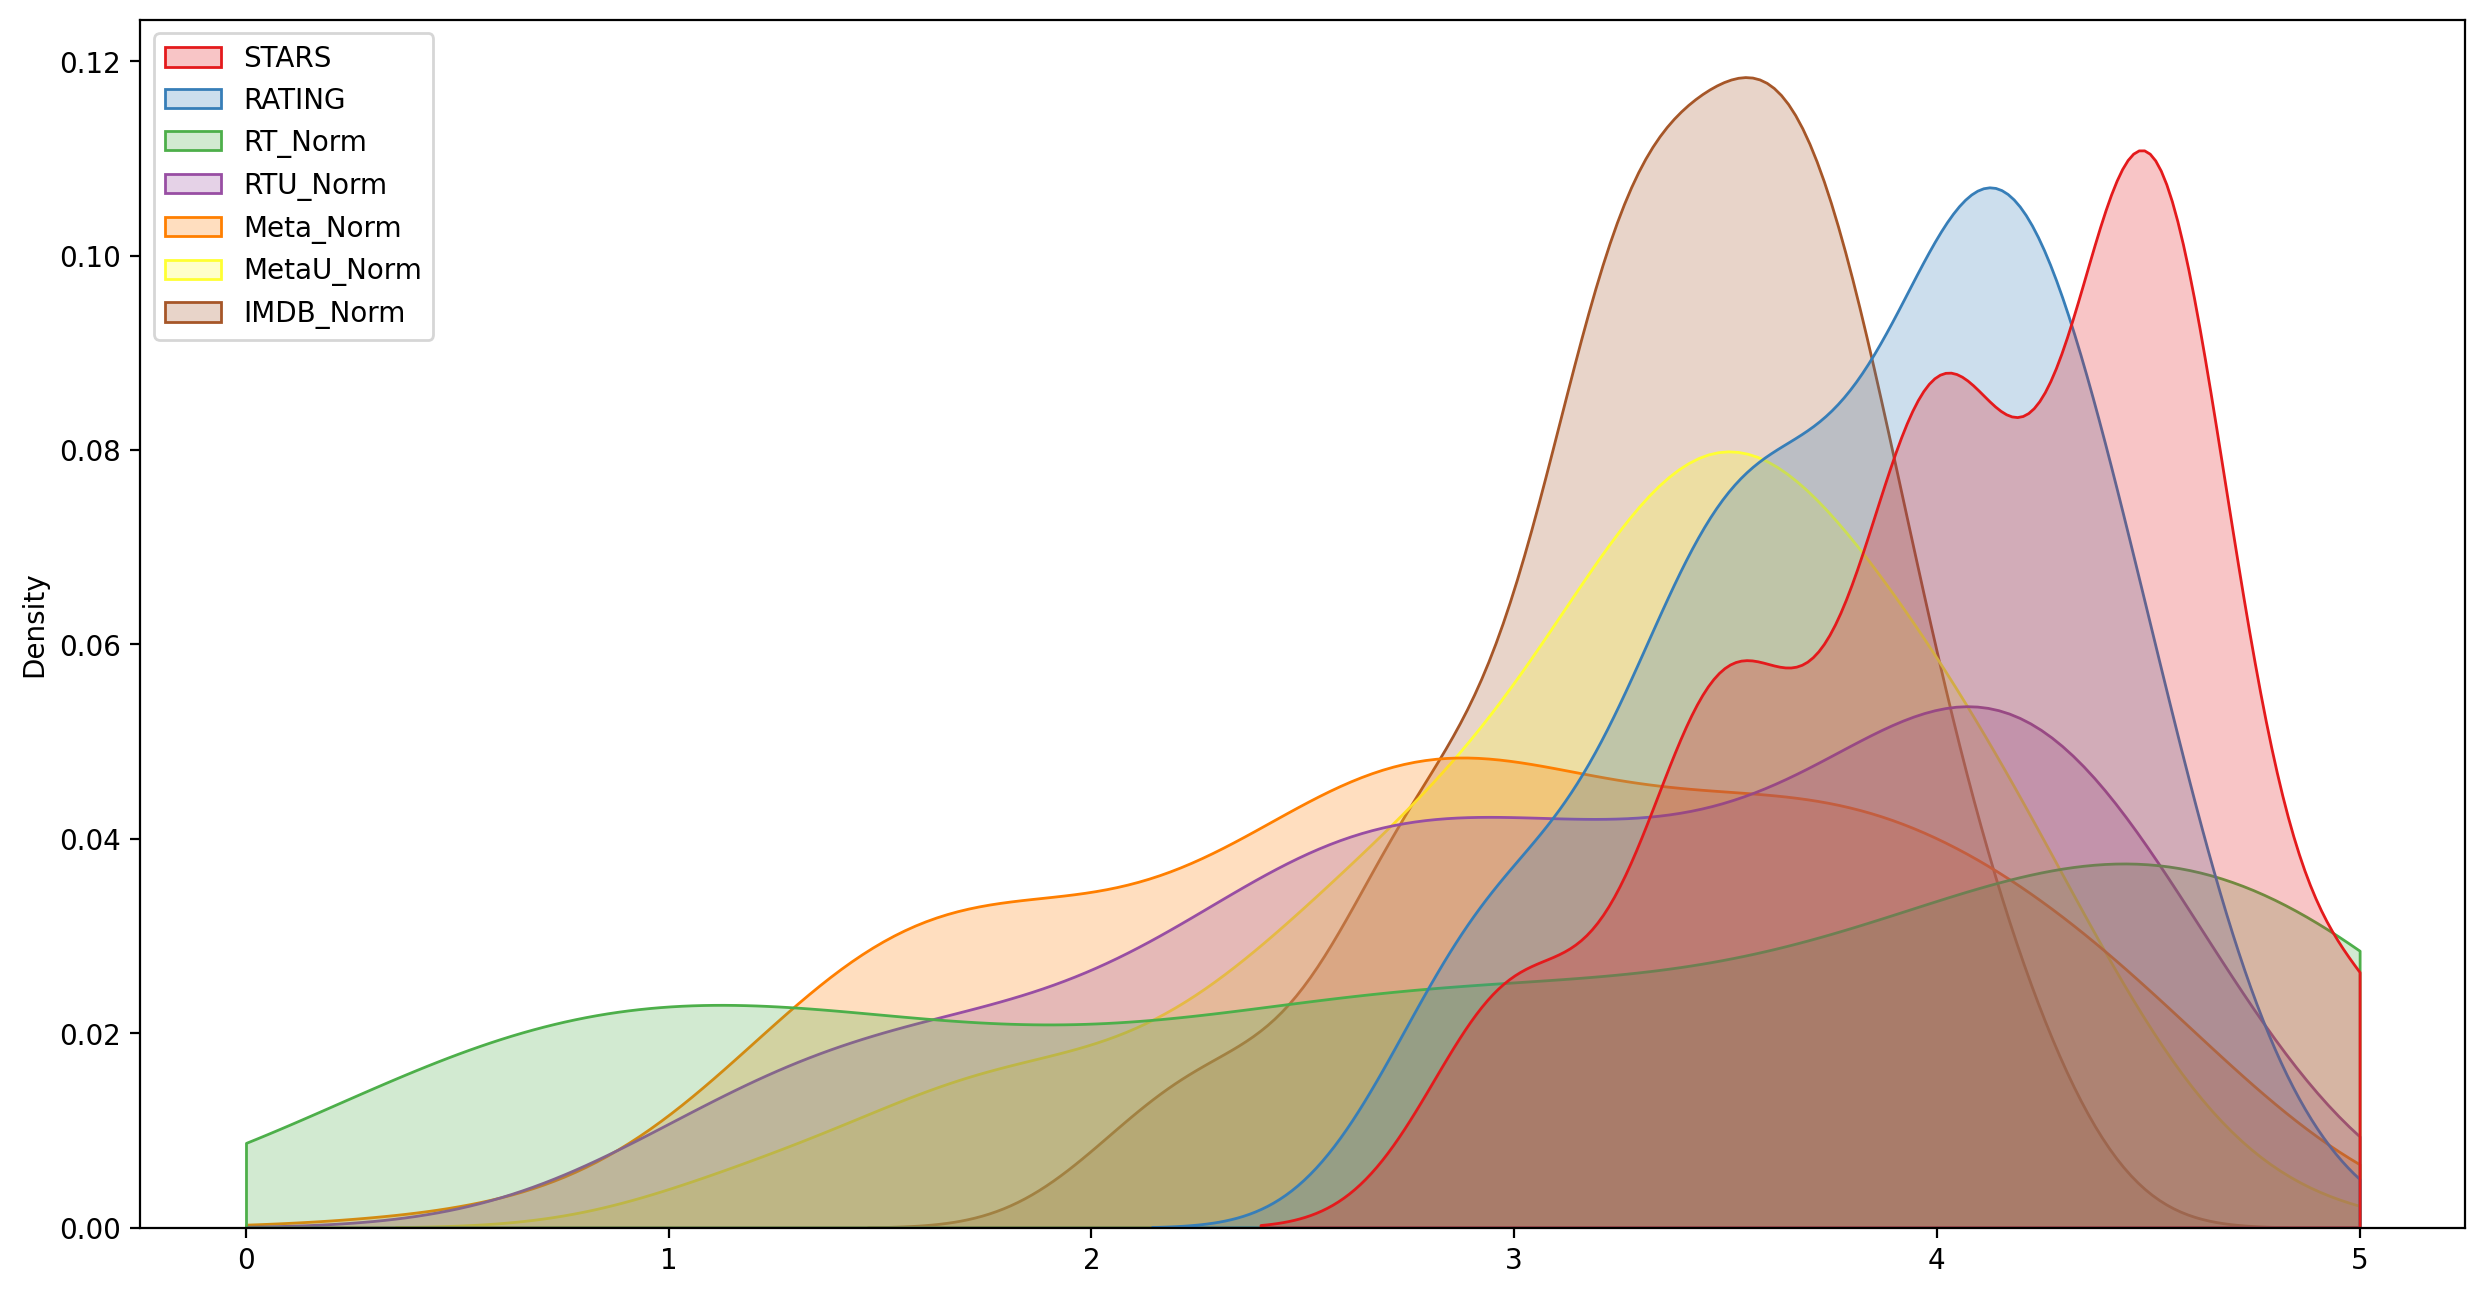

In [57]:
fig, ax = plt.subplots(figsize=(15,8), dpi=200)
sns.kdeplot(data=norm_scores, palette='Set1', shade=True, clip=[0,5])
move_legend(ax, "upper left")

Claramente Fandango tem uma distribuição desigual. Vemos que STARS e RATING não possui nenhum filme com nota abaixo de 2. A distribuição do RT é a mais uniforme. Vamos comparar esses dois.

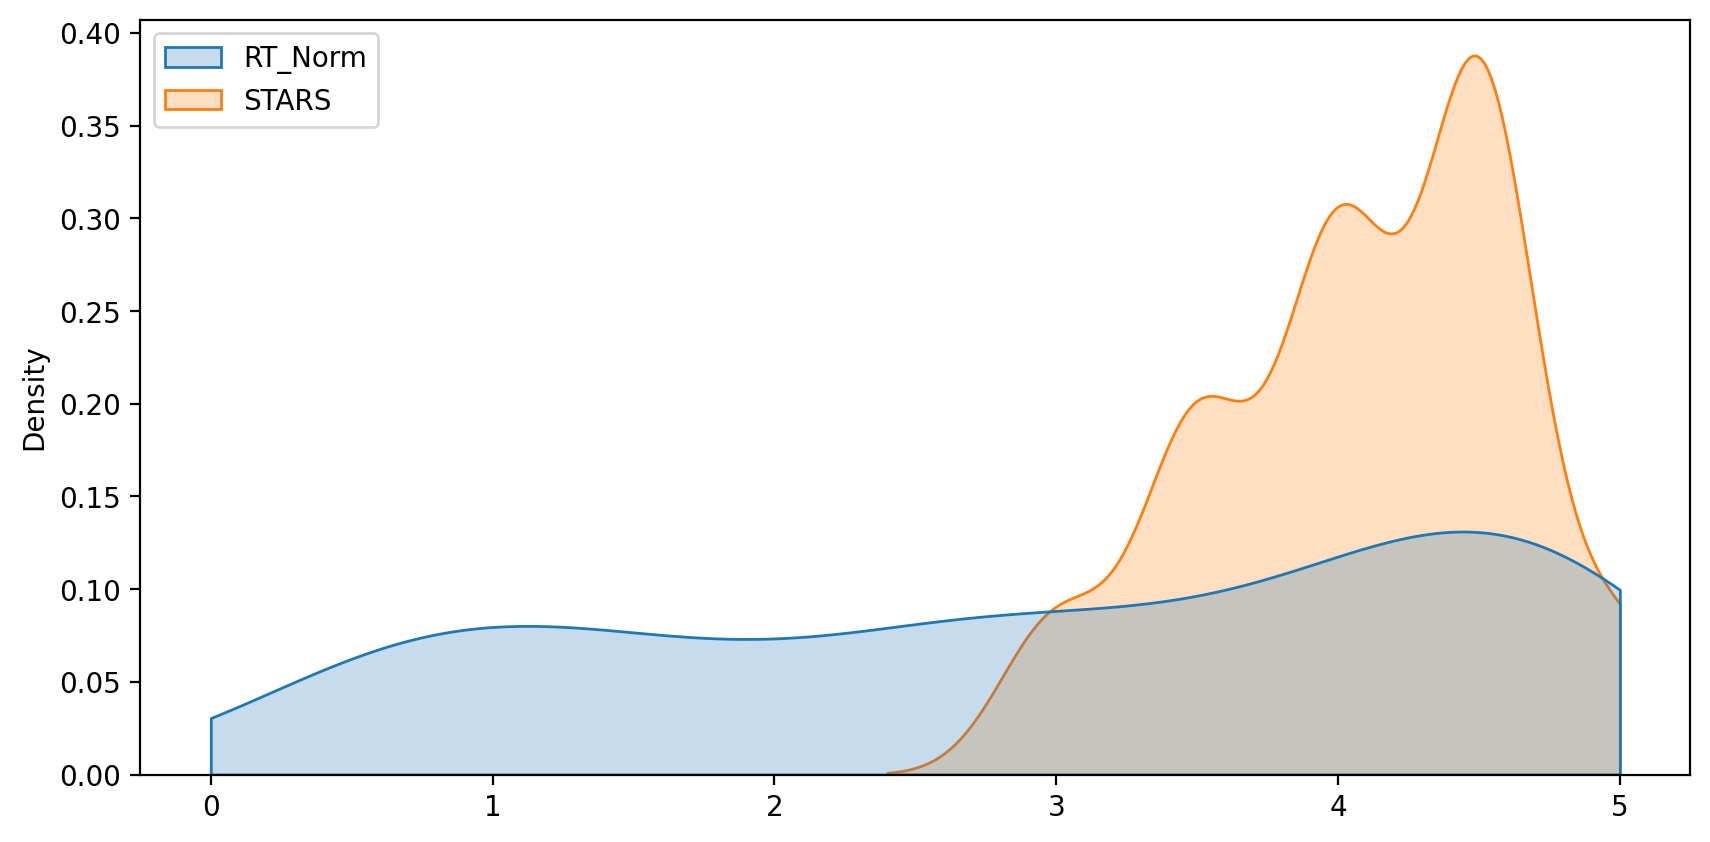

In [58]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], shade=True, clip=[0,5])
move_legend(ax, "upper left")

Vamos criar um hisplot comparando todos os scores normalizados

<AxesSubplot:ylabel='Count'>

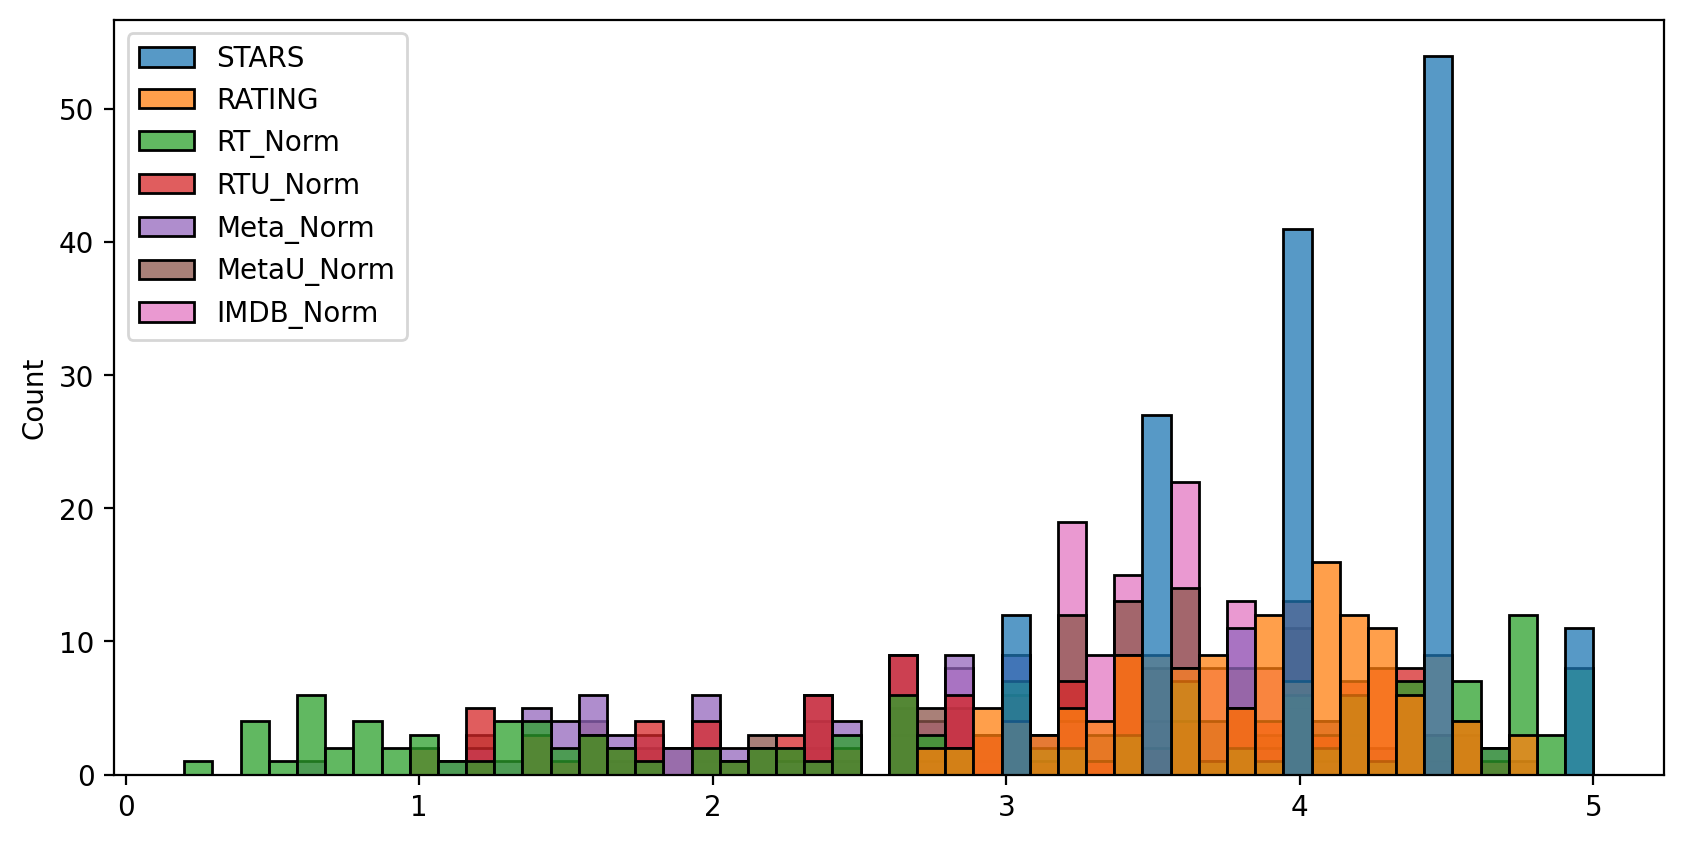

In [59]:
plt.figure(figsize=(10,5), dpi=200)
sns.histplot(data=norm_scores, bins=50)


### Como os piores filmes são classificados em todas as plataformas?

Criamos um clustermap de todos os scores normalizados. Note a diferença nas avaliações, filmes com notas altas devem ser agrupados juntos ao invés dos filmes com nota baixa.

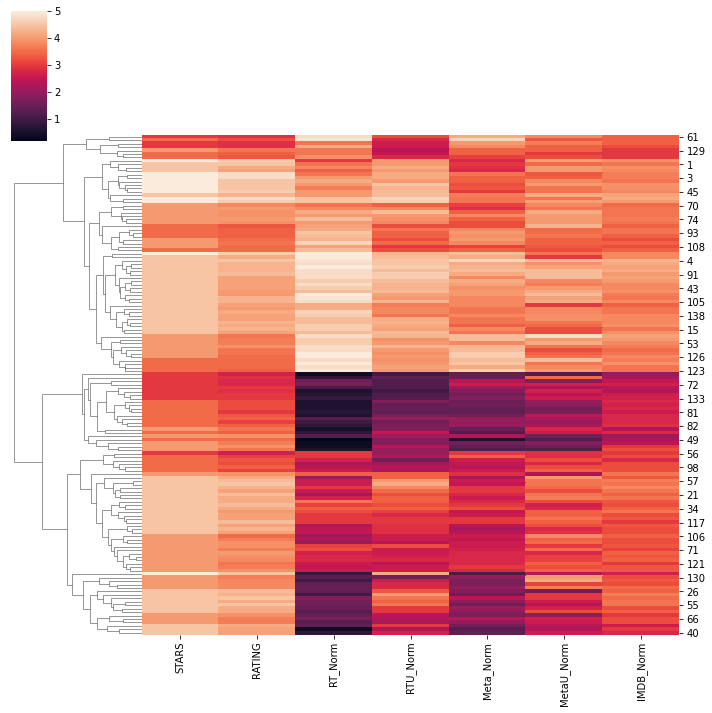

In [60]:
sns.clustermap(data=norm_scores, col_cluster=False)

Claramente, o Fandango está classificando os filmes muito mais alto do que outros sites, especialmente considerando que está exibindo uma versão arredondada da classificação. Vamos examinar os 10 piores filmes baseado na avaliação do RT. Primeiro, precisamos criar uma coluna 'FILM' na tabela norm_scores.

In [61]:
norm_scores['FILM'] = combination['FILM']
norm_scores.head()

C:\Users\henri\anaconda3\envs\new_requirements1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [62]:
norm_scores.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Visualizaremos a distribuição das avaliações por todas as plataformas para os 10 piores filmes.

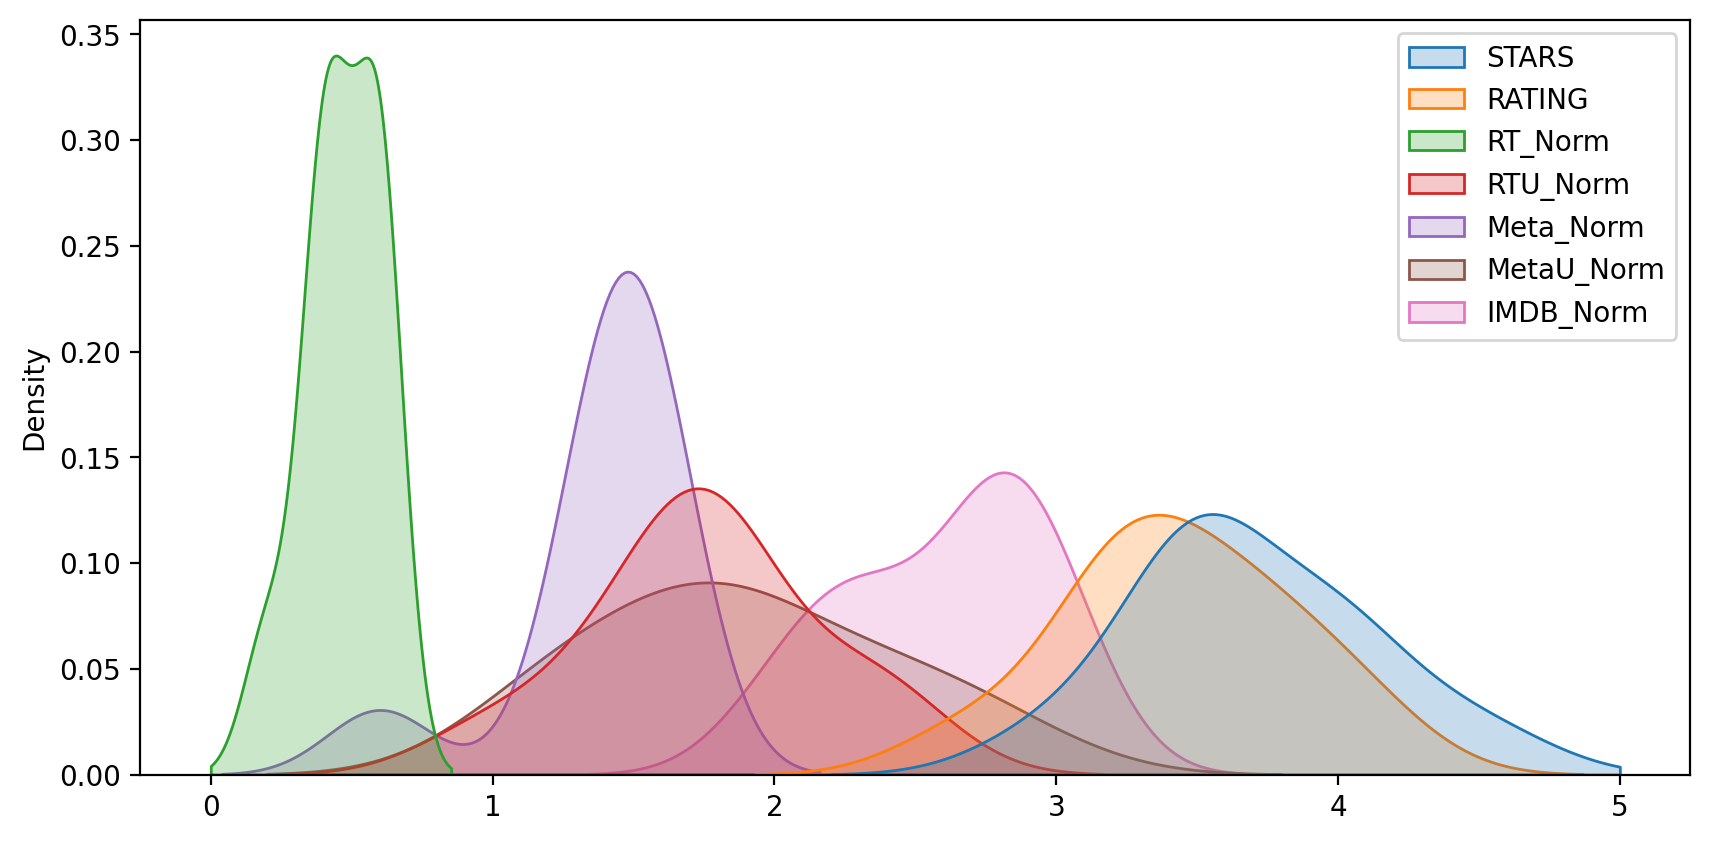

In [63]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.kdeplot(data=norm_scores.nsmallest(10, 'RT_Norm'), shade=True, clip=[0,5])
move_legend(ax, 'upper right')

Vemos que os piores filmes do Fandango têm notas acima de 2 apenas. Já para o RT não chega nem à 1 ponto.